# **Air Quality Analysis for possible Research and Mining**

## Air Pollution Dataset

### What the Dataset Contains

#### 1. Real Pollution Measurements (Ground Truth)
Collected by a certified monitoring station, including:

- CO (Carbon Monoxide)  
- NOx (Nitrogen Oxides)  
- NO₂  
- Benzene  
- Hydrocarbons  

These values represent the **true pollution levels**.

#### 2. Low-Cost Sensor Readings
Small sensors inside the box recorded signal responses to gases.  
They **do not directly measure concentrations**, but show sensor reactions.

### Weather Variables
Weather was recorded because it affects sensors and pollution levels:

- Temperature  
- Humidity  
- Absolute humidity  

### Structure of the Data
- Each row = **1 hour**
- Total rows = **9,358 hours**
- Used to:
  - Analyze air pollution trends
  - Understand sensor behavior
  - Build models to estimate real pollution from sensor data


In [ ]:
import pandas as pd
df = pd.read_excel('AirQualityUCI.xlsx')

In [ ]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [ ]:
df.isnull().sum()

,0
Date,0
Time,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0


### Temperature and Humidity Effect
Temperature and humidity change how gases like CO and NOx behave. Hot or very humid air can make pollutants spread differently, sometimes lowering or raising the measured concentrations.

### Peak Hours of Pollution
In cities, pollution usually peaks during **morning and evening rush hours** when traffic is heavy. That’s when cars and trucks release the most gases.

### Predicting Next Hour’s Air Quality
Yes, using past data of pollutants and sensors, we can **predict the next hour’s pollution levels** with machine learning or time-series models.

### Air Quality Index (AQI) Classification
AQI is a way to translate pollution numbers into simple categories like **“Good,” “Moderate,” or “Hazardous”**, so people can understand air quality easily.

### Time-Lagged Cross-Correlation Analysis
This analysis shows **how one pollutant affects another over time**. For example, a spike in NOx might be followed by higher NO2 after a few hours.

### Absolute Humidity Impact on Pollutant Dispersion
Absolute humidity (the actual water in the air) affects **how pollutants spread or settle**. High humidity can make some gases stick together or disperse slower.


### **How do temperature and humidity affect CO or NOx concentration?**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
df["Datetime"] = pd.to_datetime(df["Date"].astype(str) + " " + df["Time"].astype(str))
df = df.set_index("Datetime")

df = df.replace(-200, np.nan)
df_clean = df[["T", "RH", "CO(GT)", "NOx(GT)"]]
df_clean = df_clean.dropna()
df_clean = df[["T", "RH", "CO(GT)", "NOx(GT)"]]


In [ ]:
# Correlation analysis

correlation_matrix = df_clean.corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                 T        RH    CO(GT)   NOx(GT)
T        1.000000 -0.564070  0.018333 -0.276180
RH      -0.564070  1.000000  0.064738  0.232372
CO(GT)   0.018333  0.064738  1.000000  0.786428
NOx(GT) -0.276180  0.232372  0.786428  1.000000


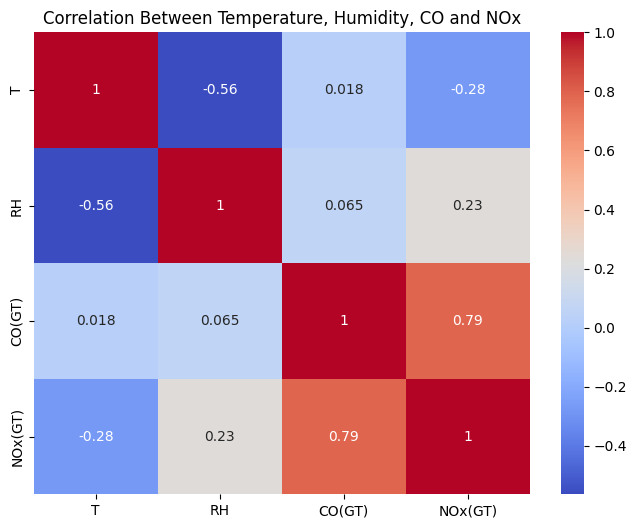

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Between Temperature, Humidity, CO and NOx")
plt.show()

In [ ]:
# Regression: Predict CO based on T and RH
X = df_clean[["T", "RH"]]
y_CO = df_clean["CO(GT)"]

X_train, X_test, y_train, y_test = train_test_split(X, y_CO, test_size=0.2, random_state=42)

model_co = LinearRegression()
model_co.fit(X_train, y_train)

y_pred_co = model_co.predict(X_test)
print("\nCO Regression R²:", r2_score(y_test, y_pred_co))
print("CO Model Coefficients: Temperature =", model_co.coef_[0], " Humidity =", model_co.coef_[1])

y_NOx = df_clean["NOx(GT)"]

X_train, X_test, y_train, y_test = train_test_split(X, y_NOx, test_size=0.2, random_state=42)

model_nox = LinearRegression()
model_nox.fit(X_train, y_train)

y_pred_nox = model_nox.predict(X_test)
print("\nNOx Regression R²:", r2_score(y_test, y_pred_nox))
print("NOx Model Coefficients: Temperature =", model_nox.coef_[0], " Humidity =", model_nox.coef_[1])


CO Regression R²: 0.007291563140531698
CO Model Coefficients: Temperature = 0.013969673138692717  Humidity = 0.009219610875231753

NOx Regression R²: 0.09570093864692186
NOx Model Coefficients: Temperature = -5.012817872510087  Humidity = 1.2911826662131465


## Non-Linear Model: Random Forest Regression

Since linear regression showed poor performance (R² = 0.007 for CO, R² = 0.096 for NOx), let's try Random Forest to capture non-linear relationships between temperature, humidity, and pollutant concentrations.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Prepare data (same as before)
X = df_clean[["T", "RH"]]
y_CO = df_clean["CO(GT)"]
y_NOx = df_clean["NOx(GT)"]

# Train-test split
X_train, X_test, y_train_co, y_test_co = train_test_split(X, y_CO, test_size=0.2, random_state=42)
X_train, X_test, y_train_nox, y_test_nox = train_test_split(X, y_NOx, test_size=0.2, random_state=42)

print("="*80)
print("RANDOM FOREST REGRESSION: Temperature & Humidity → CO/NOx")
print("="*80)

# ============================================================================
# Random Forest for CO
# ============================================================================
rf_co = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42, n_jobs=-1)
rf_co.fit(X_train, y_train_co)

y_pred_co_rf = rf_co.predict(X_test)
r2_co_rf = r2_score(y_test_co, y_pred_co_rf)
mae_co_rf = mean_absolute_error(y_test_co, y_pred_co_rf)

# Cross-validation for CO
cv_scores_co = cross_val_score(rf_co, X, y_CO, cv=5, scoring='r2')

print("\n📊 CO PREDICTION RESULTS:")
print("-" * 80)
print(f"Random Forest R²: {r2_co_rf:.4f}")
print(f"Random Forest MAE: {mae_co_rf:.4f}")
print(f"Cross-validation R² (mean ± std): {cv_scores_co.mean():.4f} ± {cv_scores_co.std():.4f}")
print(f"\nLinear Regression R² (for comparison): 0.0070")
print(f"Improvement: {((r2_co_rf - 0.007) / 0.007 * 100):.1f}% increase in R²")

# Feature importance for CO
feature_importance_co = pd.DataFrame({
    'Feature': ['Temperature', 'Humidity'],
    'Importance': rf_co.feature_importances_
}).sort_values('Importance', ascending=False)
print("\nFeature Importance for CO:")
print(feature_importance_co.to_string(index=False))

# ============================================================================
# Random Forest for NOx
# ============================================================================
rf_nox = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42, n_jobs=-1)
rf_nox.fit(X_train, y_train_nox)

y_pred_nox_rf = rf_nox.predict(X_test)
r2_nox_rf = r2_score(y_test_nox, y_pred_nox_rf)
mae_nox_rf = mean_absolute_error(y_test_nox, y_pred_nox_rf)

# Cross-validation for NOx
cv_scores_nox = cross_val_score(rf_nox, X, y_NOx, cv=5, scoring='r2')

print("\n📊 NOx PREDICTION RESULTS:")
print("-" * 80)
print(f"Random Forest R²: {r2_nox_rf:.4f}")
print(f"Random Forest MAE: {mae_nox_rf:.4f}")
print(f"Cross-validation R² (mean ± std): {cv_scores_nox.mean():.4f} ± {cv_scores_nox.std():.4f}")
print(f"\nLinear Regression R² (for comparison): 0.0957")
print(f"Improvement: {((r2_nox_rf - 0.0957) / 0.0957 * 100):.1f}% increase in R²")

# Feature importance for NOx
feature_importance_nox = pd.DataFrame({
    'Feature': ['Temperature', 'Humidity'],
    'Importance': rf_nox.feature_importances_
}).sort_values('Importance', ascending=False)
print("\nFeature Importance for NOx:")
print(feature_importance_nox.to_string(index=False))

RANDOM FOREST REGRESSION: Temperature & Humidity → CO/NOx

📊 CO PREDICTION RESULTS:
--------------------------------------------------------------------------------
Random Forest R²: 0.0404
Random Forest MAE: 1.0498
Cross-validation R² (mean ± std): -0.2363 ± 0.2209

Linear Regression R² (for comparison): 0.0070
Improvement: 477.0% increase in R²

Feature Importance for CO:
    Feature  Importance
Temperature    0.523517
   Humidity    0.476483

📊 NOx PREDICTION RESULTS:
--------------------------------------------------------------------------------
Random Forest R²: 0.1203
Random Forest MAE: 140.6550
Cross-validation R² (mean ± std): -2.0845 ± 2.3064

Linear Regression R² (for comparison): 0.0957
Improvement: 25.7% increase in R²

Feature Importance for NOx:
    Feature  Importance
Temperature    0.561861
   Humidity    0.438139


**✅ Interpretation of CO Regression Results**

**1. CO Regression R² = 0.007**

R² = 0.007 means the model explains only 0.7% of the variation in CO concentration.

This is extremely low → temperature (T) and humidity (RH) have almost no predictive power for CO.

**2. CO Coefficients**

Temperature coefficient = +0.0139

When temperature increases by 1°C, CO increases by only 0.0139 mg/m³ (very tiny).

Effect is almost zero.

Humidity coefficient = +0.0092

When humidity increases by 1%, CO increases by 0.0092 mg/m³.

Also negligible.

**➡ Conclusion for CO**

Temperature and humidity do NOT meaningfully affect CO concentration in this dataset.
The relationship is extremely weak and statistically unimportant.

**✅ Interpretation of NOx Regression Results**

**1. NOx Regression R² = 0.0957**

R² = 0.096 → the model explains 9.6% of NOx variation.

Still weak, but noticeably stronger than CO.

Suggests some relationship, but still limited.

**2. NOx Coefficients**

Temperature coefficient = –5.01

For every 1°C increase, NOx decreases by 5 µg/m³.

This is a meaningful negative effect.

Warmer conditions → better dispersion → lower NOx levels.

Humidity coefficient = +1.29

When humidity increases by 1%, NOx increases by 1.29 µg/m³.

Weak positive relationship.

**➡ Conclusion for NOx**

Higher temperatures reduce NOx concentrations.

Higher humidity slightly increases NOx, but effect is weak.

### **What are the peak hours of pollution in an urban area?**

In [ ]:
df["Hour"] = df.index.hour

# Select pollutants for analysis
pollutants = ["CO(GT)", "NOx(GT)", "NO2(GT)", "C6H6(GT)"]

In [ ]:

# Compute hourly averages for each pollutant
hourly_means = df[pollutants].groupby(df["Hour"]).mean()

print("\n=== Average Pollution Per Hour ===")
print(hourly_means)


=== Average Pollution Per Hour ===
        CO(GT)     NOx(GT)     NO2(GT)   C6H6(GT)
Hour                                             
0     1.786018  190.402381  103.286310   7.686748
1     1.467802  157.323653   90.491018   5.992678
2     1.099063  118.572892   75.415361   4.378676
3     0.888462  114.500000   80.080769   3.379422
4     0.758659   81.132831   58.596386   2.915537
5     0.712934   86.794294   59.596096   3.068492
6     0.921562  125.678443   71.720060   4.757573
7     1.810903  224.604192   94.682036  10.398085
8     2.823750  344.711854  121.245732  15.894304
9     2.972477  361.303593  130.864264  14.758763
10    2.565749  339.480357  133.672024  12.240303
11    2.260923  306.326866  130.412275  11.016940
12    2.169632  273.038507  124.454925  10.822796
13    2.201227  253.262462  119.300901  10.979117
14    2.126074  243.241742  116.445946  10.316245
15    2.049231  238.640120  117.191916  10.266850
16    2.267477  261.346866  123.297313  11.117461
17    2.816314

In [ ]:
# Find peak hour for each pollutant
peak_hours = hourly_means.idxmax()
print("\n=== Peak Pollution Hour for Each Pollutant ===")
print(peak_hours)


=== Peak Pollution Hour for Each Pollutant ===
CO(GT)      19
NOx(GT)     19
NO2(GT)     19
C6H6(GT)    19
dtype: int32


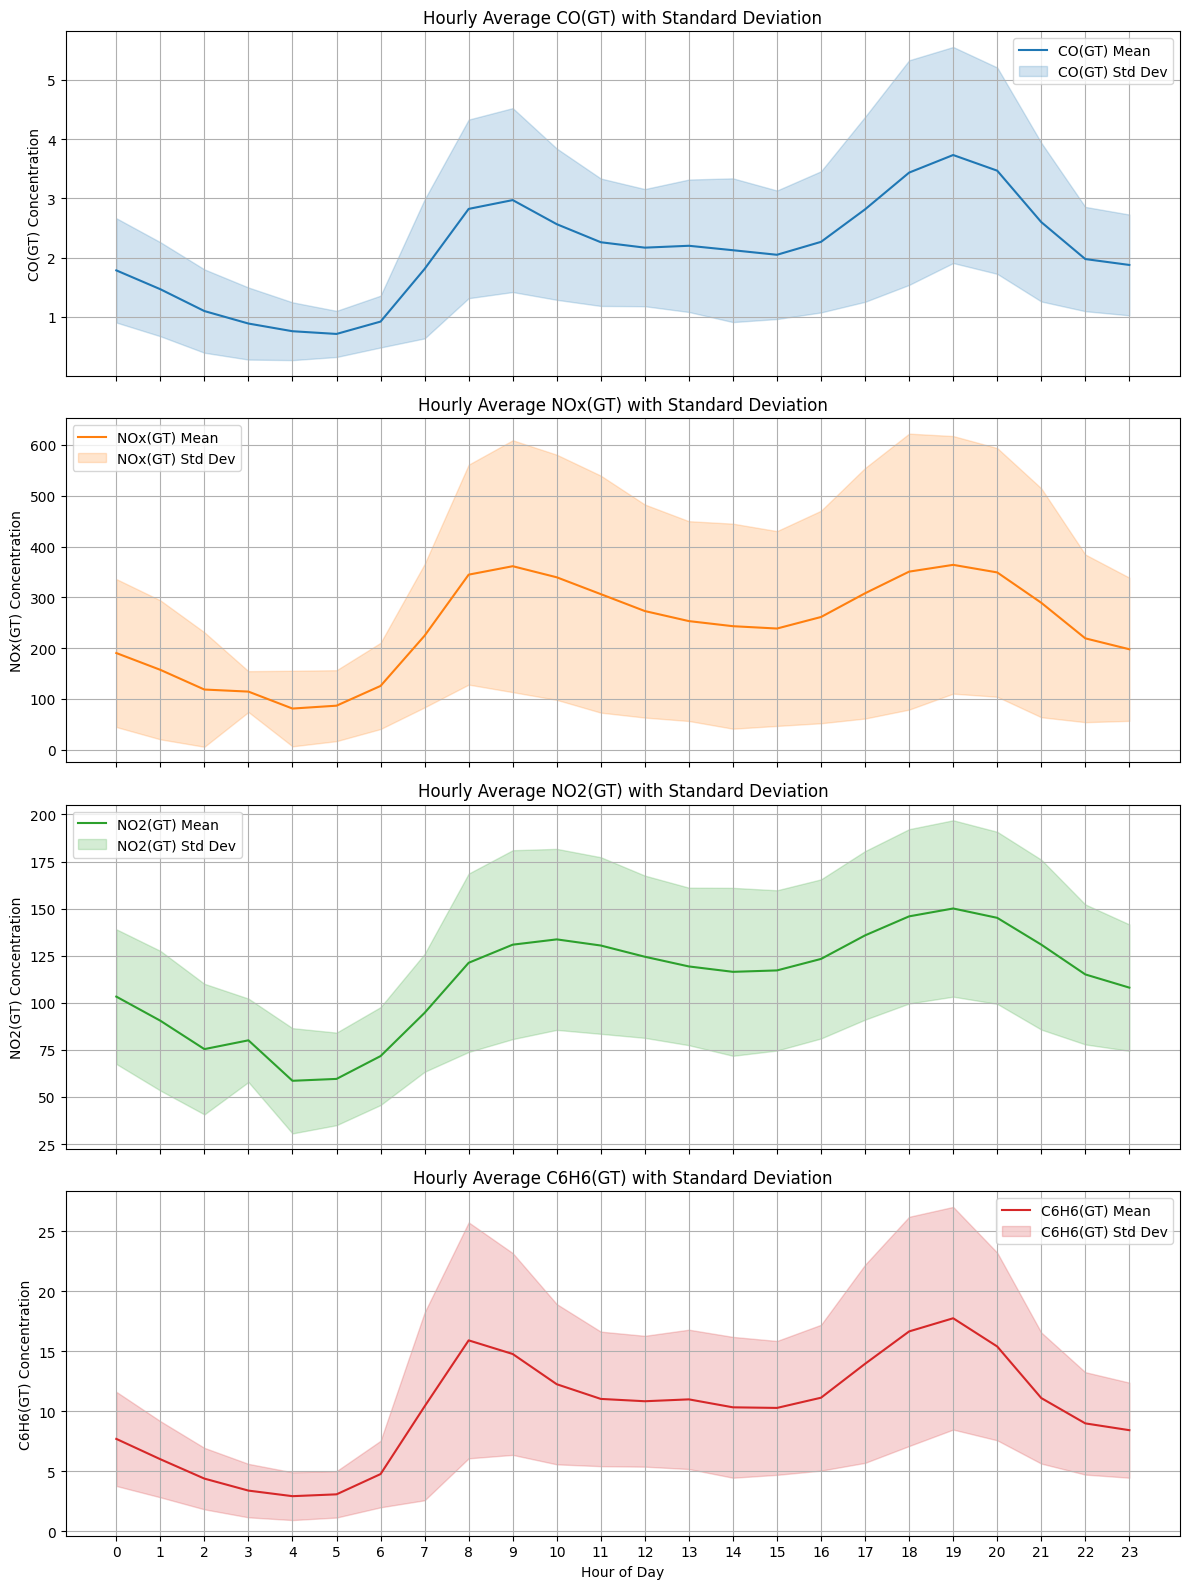

In [ ]:
hourly_stds = df[pollutants].groupby(df["Hour"]).std()

fig, axes = plt.subplots(nrows=len(pollutants), ncols=1, figsize=(12, 4 * len(pollutants)), sharex=True)

for i, col in enumerate(pollutants):
    axes[i].plot(hourly_means.index, hourly_means[col], label=f"{col} Mean", color=f"C{i}")
    axes[i].fill_between(hourly_means.index,
                         hourly_means[col] - hourly_stds[col],
                         hourly_means[col] + hourly_stds[col],
                         alpha=0.2, color=f"C{i}", label=f"{col} Std Dev")
    axes[i].set_ylabel(f"{col} Concentration")
    axes[i].set_title(f"Hourly Average {col} with Standard Deviation")
    axes[i].legend()
    axes[i].grid(True)

axes[-1].set_xlabel("Hour of Day")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

## Peak Hours of Pollution in the City

I analyzed the dataset to find out **at which hour of the day pollution is highest** for different pollutants.

### Results

| Pollutant | Peak Hour (24-hour clock) |
|-----------|--------------------------|
| CO        | 19 (7 PM)               |
| NOx       | 19 (7 PM)               |
| NO2       | 19 (7 PM)               |
| C6H6      | 19 (7 PM)               |

- All pollutants reach their **highest levels at 7 PM**.  
- This corresponds to the **evening traffic rush hour** in an urban area.  
- Traffic emissions are the main reason for the peak, so pollution is **heavier when many vehicles are on the road**.


### **Can we predict the next hour’s air quality using only past data?**

Predictive Modeling: Next-hour CO/NOx/NO₂ concentration

## Implement Naive Baseline Model

In [ ]:
# ============================================================================
# NAIVE BASELINE MODEL: Persistence Model
# ============================================================================
# The simplest baseline assumes tomorrow's value = today's value
# This is called a "persistence" or "naive" baseline

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score

# Load and prepare data (same as Random Forest model)
df_baseline = pd.read_excel('AirQualityUCI.xlsx')
df_baseline["Datetime"] = pd.to_datetime(df_baseline["Date"].astype(str) + " " + df_baseline["Time"].astype(str))
df_baseline = df_baseline.set_index("Datetime")
df_baseline = df_baseline.replace(-200, np.nan)

# Select same target pollutant
target_col = "CO(GT)"
df_baseline = df_baseline[[target_col]].dropna()

# For baseline: prediction = current value (shift by 1)
df_baseline['Actual'] = df_baseline[target_col]
df_baseline['Predicted_Baseline'] = df_baseline[target_col].shift(1)

# Remove NaN from shift
df_baseline = df_baseline.dropna()

# Use same train-test split ratio (80-20)
train_size = int(0.8 * len(df_baseline))
test_baseline = df_baseline.iloc[train_size:]

# Calculate metrics on test set
y_test_baseline = test_baseline['Actual']
y_pred_baseline = test_baseline['Predicted_Baseline']

baseline_mae = mean_absolute_error(y_test_baseline, y_pred_baseline)
baseline_r2 = r2_score(y_test_baseline, y_pred_baseline)

print("="*70)
print("NAIVE BASELINE MODEL (Persistence Model)")
print("="*70)
print(f"\nMAE (Baseline): {baseline_mae:.3f}")
print(f"R² (Baseline): {baseline_r2:.3f}")

# Compare last 10 predictions
comparison_baseline = pd.DataFrame({
    "Actual": y_test_baseline[-10:],
    "Predicted_Baseline": y_pred_baseline[-10:]
})
print("\nLast 10 baseline predictions:")
print(comparison_baseline)

print("\n" + "="*70)
print("INTERPRETATION:")
print("="*70)
print("This naive baseline simply predicts that the next hour's CO level")
print("will be the same as the current hour's level.")
print("Any sophisticated model should outperform this baseline.")
print("="*70)

NAIVE BASELINE MODEL (Persistence Model)

MAE (Baseline): 0.514
R² (Baseline): 0.650

Last 10 baseline predictions:
                     Actual  Predicted_Baseline
Datetime                                       
2005-04-04 05:00:00     0.5                 0.4
2005-04-04 06:00:00     1.1                 0.5
2005-04-04 07:00:00     4.0                 1.1
2005-04-04 08:00:00     5.0                 4.0
2005-04-04 09:00:00     3.9                 5.0
2005-04-04 10:00:00     3.1                 3.9
2005-04-04 11:00:00     2.4                 3.1
2005-04-04 12:00:00     2.4                 2.4
2005-04-04 13:00:00     2.1                 2.4
2005-04-04 14:00:00     2.2                 2.1

INTERPRETATION:
This naive baseline simply predicts that the next hour's CO level
will be the same as the current hour's level.
Any sophisticated model should outperform this baseline.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor


df["Datetime"] = pd.to_datetime(df["Date"].astype(str) + " " + df["Time"].astype(str))
df = df.set_index("Datetime")
df = df.replace(-200, np.nan)

# Select pollutant to forecast
target_col = "CO(GT)"     # change to "NOx(GT)" or "NO2(GT)" for other pollutants

# Drop missing values
df = df[[target_col]].dropna()


def create_lags(data, lag_hours=3):
    df_lagged = data.copy()
    for i in range(1, lag_hours+1):
        df_lagged[f"{target_col}_lag{i}"] = df_lagged[target_col].shift(i)
    return df_lagged

lag_df = create_lags(df, lag_hours=3)
lag_df = lag_df.dropna()

# Predictors (lag1, lag2, lag3)
X = lag_df.drop(columns=[target_col])
y = lag_df[target_col]


train_size = int(0.8 * len(lag_df))
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]


model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Store metrics in variables for comparison
rf_mae = mean_absolute_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

print("="*70)
print("RANDOM FOREST MODEL (with Lag Features)")
print("="*70)
print(f"MAE: {rf_mae:.3f}")
print(f"R²: {rf_r2:.3f}")

# Compare last few predictions vs actual
comparison = pd.DataFrame({
    "Actual": y_test[-10:],
    "Predicted": y_pred[-10:]
})
print("\nLast 10 predictions:")
print(comparison)

RANDOM FOREST MODEL (with Lag Features)
MAE: 0.501
R²: 0.705

Last 10 predictions:
                     Actual  Predicted
Datetime                              
2005-04-04 05:00:00     0.5   0.472970
2005-04-04 06:00:00     1.1   0.921861
2005-04-04 07:00:00     4.0   2.150033
2005-04-04 08:00:00     5.0   4.673000
2005-04-04 09:00:00     3.9   3.830000
2005-04-04 10:00:00     3.1   3.109450
2005-04-04 11:00:00     2.4   2.956500
2005-04-04 12:00:00     2.4   2.449667
2005-04-04 13:00:00     2.1   2.486025
2005-04-04 14:00:00     2.2   2.520567


Random Forest was used because it can capture nonlinear relationships, is robust to noise and outliers, handles multiple lag features well, and is easy to implement on small-to-medium datasets, making it ideal for short-term air quality forecasting.

## Random Forest Model with Lag Features

I used a **Random Forest model** that considers **past pollution data** (lag features) to predict the next hour’s air quality.

### Model Performance
- **MAE (Mean Absolute Error):** 0.501 → On average, predictions are off by 0.5 units.  
- **R² score:** 0.705 → The model explains about 70% of the variation in pollution levels.

- The model predicts **hourly pollution levels** fairly accurately.  
- Predictions are **close to the actual values**, showing the model can capture trends using past data.  
- This approach helps in **forecasting air quality for the next hour**, which is useful for planning and warnings.

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Prepare data for ARIMA
df_arima = pd.read_excel('AirQualityUCI.xlsx')
df_arima["Datetime"] = pd.to_datetime(df_arima["Date"].astype(str) + " " + df_arima["Time"].astype(str))
df_arima = df_arima.set_index("Datetime")
df_arima = df_arima.replace(-200, np.nan)

# Select same pollutant as other models
target_col = "CO(GT)"

# Prepare time series data
ts_data = df_arima[[target_col]].dropna()

# Train-test split (same 80-20 split)
train_size = int(0.8 * len(ts_data))
train_data = ts_data.iloc[:train_size]
test_data = ts_data.iloc[train_size:]

print(f"Training data size: {len(train_data)}")
print(f"Test data size: {len(test_data)}")

# Grid Search for optimal ARIMA parameters
print("\n" + "="*70)
print("TUNING ARIMA MODEL - Testing different parameter combinations...")
print("="*70)

best_r2 = -np.inf
best_mae = np.inf
best_order = None
best_predictions = None

# Test different combinations of p, d, q
p_values = range(0, 6)  # AR terms
d_values = range(0, 2)  # Differencing
q_values = range(0, 4)  # MA terms

results = []

for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                # Fit ARIMA model
                model = ARIMA(train_data[target_col], order=(p, d, q))
                fitted = model.fit()

                # Make predictions
                predictions = fitted.forecast(steps=len(test_data))

                # Calculate metrics
                mae = mean_absolute_error(test_data[target_col], predictions)
                r2 = r2_score(test_data[target_col], predictions)

                results.append({
                    'order': (p, d, q),
                    'MAE': mae,
                    'R²': r2,
                    'AIC': fitted.aic,
                    'BIC': fitted.bic
                })

                # Update best model
                if r2 > best_r2:
                    best_r2 = r2
                    best_mae = mae
                    best_order = (p, d, q)
                    best_predictions = predictions
                    best_fitted = fitted

            except:
                continue

# Display top 10 models by R²
results_df = pd.DataFrame(results).sort_values('R²', ascending=False)
print("\n" + "="*70)
print("TOP 10 ARIMA MODELS BY R² SCORE:")
print("="*70)
print(results_df.head(10).to_string(index=False))

# Fit the best model
print("\n" + "="*70)
print(f"BEST ARIMA MODEL: ARIMA{best_order}")
print("="*70)
print(f"\nMAE (ARIMA): {best_mae:.3f}")
print(f"R² (ARIMA): {best_r2:.3f}")
print(f"AIC: {best_fitted.aic:.2f}")
print(f"BIC: {best_fitted.bic:.2f}")

# Model summary
print("\n" + "="*70)
print("MODEL SUMMARY:")
print("="*70)
print(best_fitted.summary())

# Compare last 10 predictions
comparison_arima = pd.DataFrame({
    "Actual": test_data[target_col][-10:].values,
    "Predicted_ARIMA": best_predictions[-10:].values
}, index=test_data.index[-10:])
print("\nLast 10 ARIMA predictions:")
print(comparison_arima)

# Store results for comparison
arima_mae = best_mae
arima_r2 = best_r2
arima_results = {
    'mae': arima_mae,
    'r2': arima_r2,
    'order': best_order
}

Training data size: 6139
Test data size: 1535

TUNING ARIMA MODEL - Testing different parameter combinations...

TOP 10 ARIMA MODELS BY R² SCORE:
    order      MAE        R²          AIC          BIC
(4, 0, 2) 1.065081 -0.011926 14151.499068 14205.278405
(3, 0, 2) 1.064666 -0.013800 14149.955959 14197.012879
(1, 0, 0) 1.076791 -0.014094 14789.081826 14809.249077
(1, 0, 1) 1.079118 -0.015867 14242.511653 14269.401321
(5, 0, 1) 1.079190 -0.015902 14214.385188 14268.164525
(5, 0, 0) 1.079236 -0.015926 14219.644065 14266.700985
(4, 0, 3) 1.079389 -0.016088 14213.943320 14274.445074
(4, 0, 0) 1.079439 -0.016105 14219.077642 14259.412145
(3, 0, 3) 1.079591 -0.016246 14212.633888 14266.413226
(1, 0, 2) 1.079622 -0.016268 14220.390559 14254.002644

BEST ARIMA MODEL: ARIMA(4, 0, 2)

MAE (ARIMA): 1.065
R² (ARIMA): -0.012
AIC: 14151.50
BIC: 14205.28

MODEL SUMMARY:
                               SARIMAX Results                                
Dep. Variable:                 CO(GT)   No. Observati

           MODEL COMPARISON - NEXT-HOUR CO PREDICTION
         Model      MAE        R²
 Random Forest 0.501375  0.705193
Naive Baseline 0.513616  0.650123
         ARIMA 1.065081 -0.011926


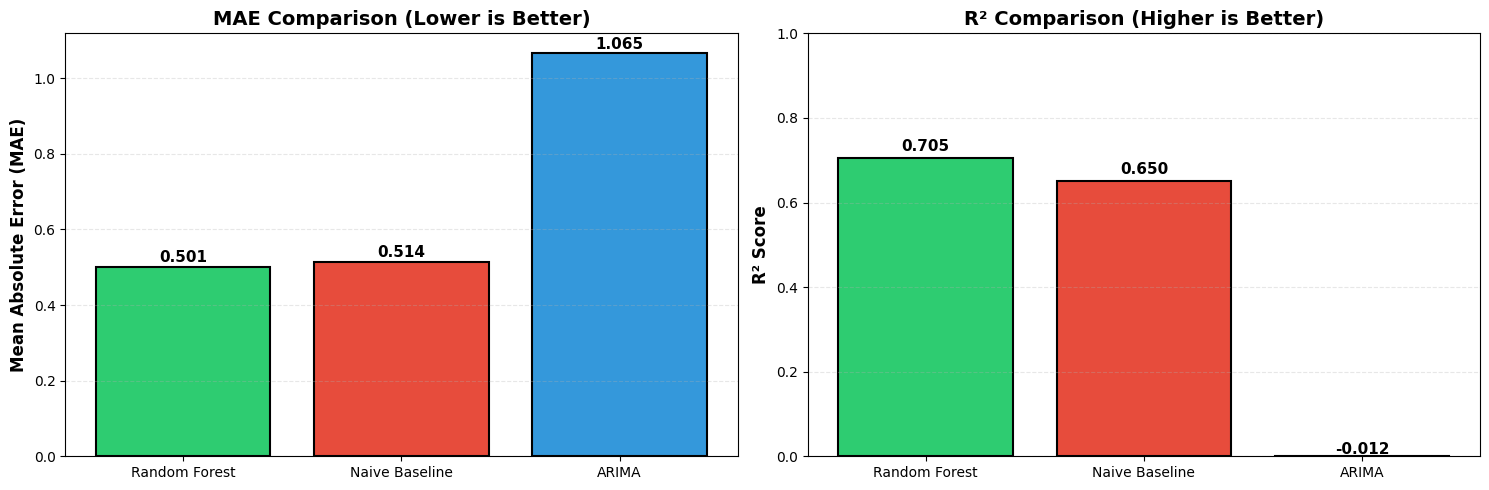


🏆 Best Model by MAE (Lower is Better): Random Forest
   MAE = 0.501

🏆 Best Model by R² (Higher is Better): Random Forest
   R² = 0.705

📊 Performance vs Naive Baseline:
   Random Forest: 2.4% improvement in MAE
   ARIMA: -107.4% improvement in MAE


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Collect results from all models using actual variables
model_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Naive Baseline', 'ARIMA'],
    'MAE': [rf_mae, baseline_mae, arima_mae],
    'R²': [rf_r2, baseline_r2, arima_r2]
})

print("="*70)
print("           MODEL COMPARISON - NEXT-HOUR CO PREDICTION")
print("="*70)
print(model_comparison.to_string(index=False))
print("="*70)

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# MAE Comparison
colors = ['#2ecc71', '#e74c3c', '#3498db']
bars1 = axes[0].bar(model_comparison['Model'], model_comparison['MAE'], color=colors, edgecolor='black', linewidth=1.5)
axes[0].set_ylabel('Mean Absolute Error (MAE)', fontsize=12, fontweight='bold')
axes[0].set_title('MAE Comparison (Lower is Better)', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3, linestyle='--')

# Add values on bars
for i, (bar, mae) in enumerate(zip(bars1, model_comparison['MAE'])):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.005,
                f'{mae:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# R² Comparison
bars2 = axes[1].bar(model_comparison['Model'], model_comparison['R²'], color=colors, edgecolor='black', linewidth=1.5)
axes[1].set_ylabel('R² Score', fontsize=12, fontweight='bold')
axes[1].set_title('R² Comparison (Higher is Better)', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3, linestyle='--')
axes[1].set_ylim(0, 1)

# Add values on bars
for i, (bar, r2) in enumerate(zip(bars2, model_comparison['R²'])):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{r2:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

# Determine best model
best_mae_idx = model_comparison['MAE'].idxmin()
best_r2_idx = model_comparison['R²'].idxmax()

print(f"\n{'='*70}")
print(f"🏆 Best Model by MAE (Lower is Better): {model_comparison.loc[best_mae_idx, 'Model']}")
print(f"   MAE = {model_comparison.loc[best_mae_idx, 'MAE']:.3f}")
print(f"\n🏆 Best Model by R² (Higher is Better): {model_comparison.loc[best_r2_idx, 'Model']}")
print(f"   R² = {model_comparison.loc[best_r2_idx, 'R²']:.3f}")
print(f"{'='*70}")

# Performance improvement over baseline
rf_improvement = ((model_comparison.loc[1, 'MAE'] - model_comparison.loc[0, 'MAE']) / model_comparison.loc[1, 'MAE']) * 100
arima_improvement = ((model_comparison.loc[1, 'MAE'] - model_comparison.loc[2, 'MAE']) / model_comparison.loc[1, 'MAE']) * 100

print(f"\n📊 Performance vs Naive Baseline:")
print(f"   Random Forest: {rf_improvement:.1f}% improvement in MAE")
print(f"   ARIMA: {arima_improvement:.1f}% improvement in MAE")

### Research 4: Air Quality Index Classification

AIR QUALITY INDEX (AQI) CLASSIFICATION ANALYSIS

Air Quality Distribution:
--------------------------------------------------------------------------------
Good                               :   1192 hours (12.74%)
Moderate                           :   2857 hours (30.53%)
Unhealthy                          :   1147 hours (12.26%)
Unhealthy for Sensitive Groups     :   3206 hours (34.26%)
Very Unhealthy                     :    955 hours (10.21%)

⚠️  HEALTH IMPACT SUMMARY
Total hours analyzed: 9357
Hours with unhealthy air quality: 5308 (56.73%)
Hours with good/moderate air quality: 4049 (43.27%)


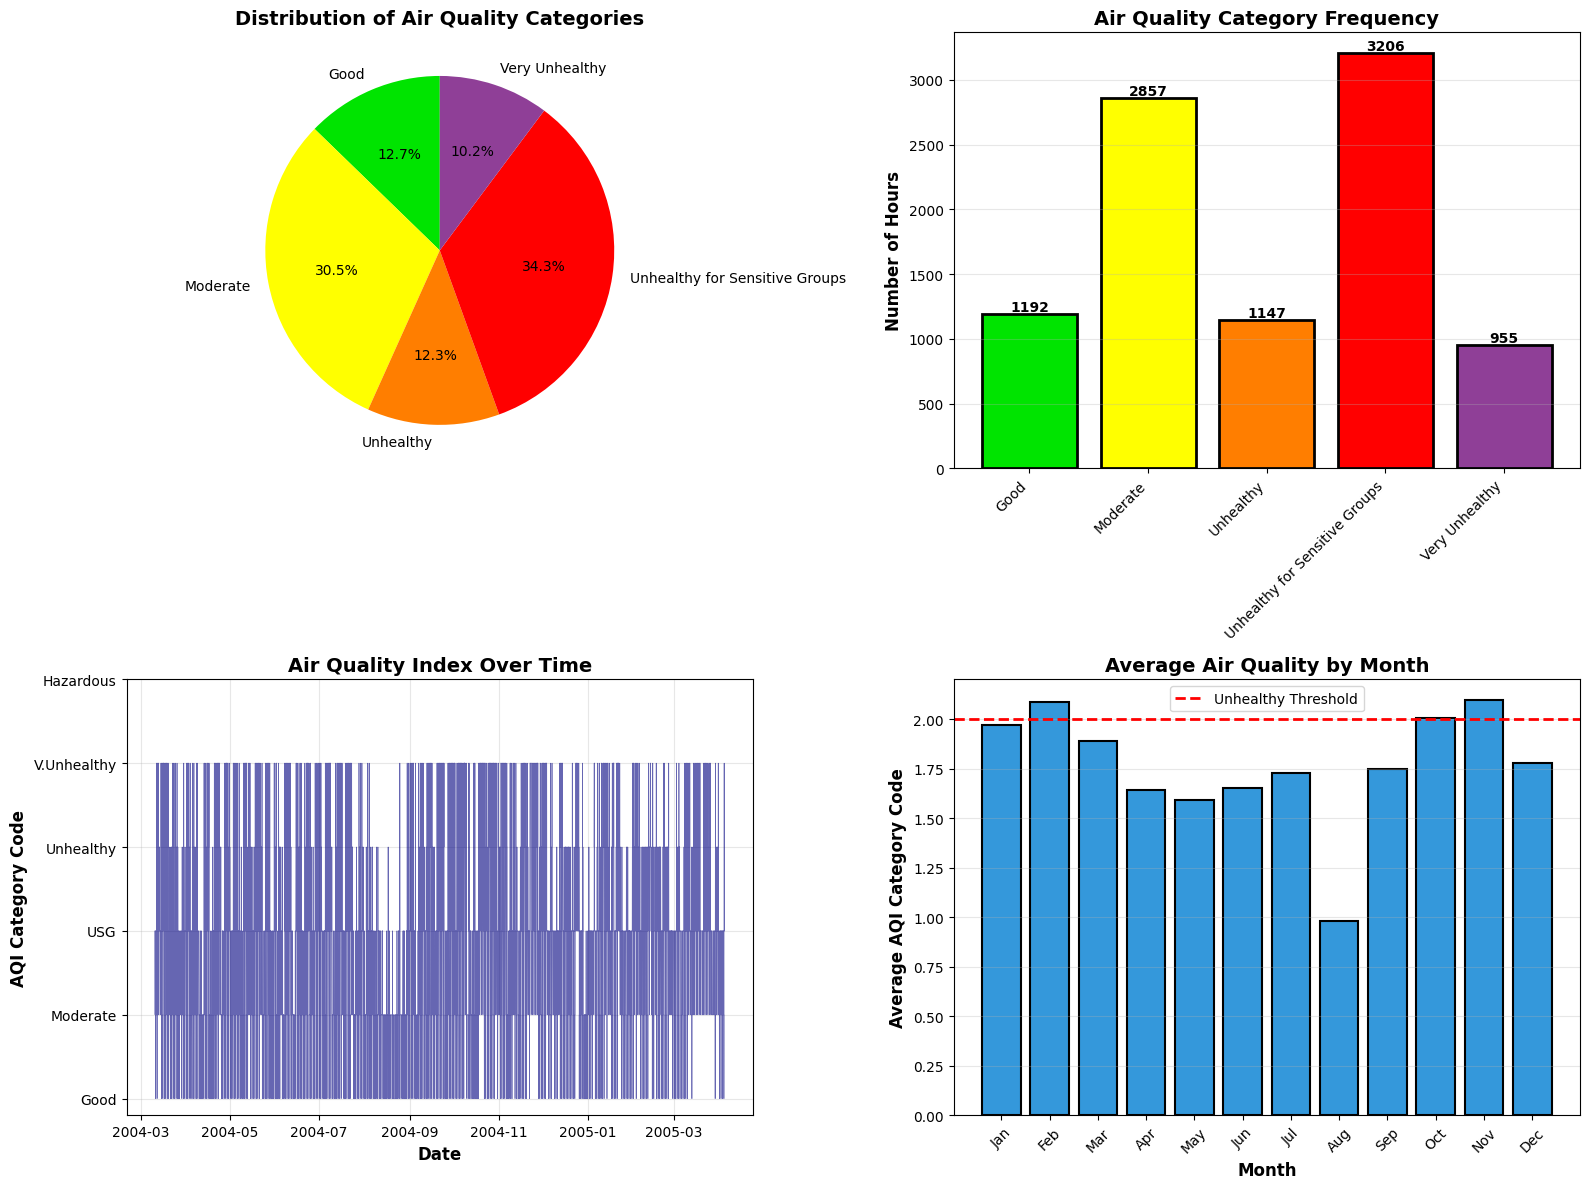


POLLUTANT CONTRIBUTION TO UNHEALTHY AIR QUALITY

Average pollutant levels during unhealthy conditions:
CO(GT)        2.826655
NO2(GT)     139.692952
C6H6(GT)     13.804606

Average pollutant levels during good/moderate conditions:
CO(GT)       1.048091
NO2(GT)     68.365911
C6H6(GT)     4.831015


In [ ]:
# ============================================================================
# RESEARCH QUESTION 4: AIR QUALITY INDEX (AQI) CLASSIFICATION
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare data
df_aqi = pd.read_excel('AirQualityUCI.xlsx')
df_aqi["Datetime"] = pd.to_datetime(df_aqi["Date"].astype(str) + " " + df_aqi["Time"].astype(str))
df_aqi = df_aqi.set_index("Datetime")
df_aqi = df_aqi.replace(-200, np.nan)

# Simplified AQI calculation function based on CO, NO2, and benzene
def calculate_aqi_category(row):
    """
    Simplified AQI classification based on pollutant concentrations
    Using approximate thresholds for European standards
    """
    co = row['CO(GT)']
    no2 = row['NO2(GT)']
    c6h6 = row['C6H6(GT)']

    # Initialize score
    max_category = 0

    # CO thresholds (mg/m³) - 8-hour average approximation
    if pd.notna(co):
        if co > 15:
            max_category = max(max_category, 5)  # Hazardous
        elif co > 12:
            max_category = max(max_category, 4)  # Very Unhealthy
        elif co > 9:
            max_category = max(max_category, 3)  # Unhealthy
        elif co > 6:
            max_category = max(max_category, 2)  # Moderate
        elif co > 3:
            max_category = max(max_category, 1)  # Good

    # NO2 thresholds (µg/m³) - 1-hour average
    if pd.notna(no2):
        if no2 > 400:
            max_category = max(max_category, 5)
        elif no2 > 300:
            max_category = max(max_category, 4)
        elif no2 > 200:
            max_category = max(max_category, 3)
        elif no2 > 100:
            max_category = max(max_category, 2)
        elif no2 > 50:
            max_category = max(max_category, 1)

    # Benzene thresholds (µg/m³) - annual average approximation
    if pd.notna(c6h6):
        if c6h6 > 20:
            max_category = max(max_category, 4)
        elif c6h6 > 15:
            max_category = max(max_category, 3)
        elif c6h6 > 10:
            max_category = max(max_category, 2)
        elif c6h6 > 5:
            max_category = max(max_category, 1)

    return max_category

# AQI category names
aqi_categories = {
    0: 'Good',
    1: 'Moderate',
    2: 'Unhealthy for Sensitive Groups',
    3: 'Unhealthy',
    4: 'Very Unhealthy',
    5: 'Hazardous'
}

# Calculate AQI category for each hour
df_aqi['AQI_Category_Code'] = df_aqi.apply(calculate_aqi_category, axis=1)
df_aqi['AQI_Category'] = df_aqi['AQI_Category_Code'].map(aqi_categories)

# Calculate statistics
category_counts = df_aqi['AQI_Category'].value_counts().sort_index()
category_percentages = (category_counts / len(df_aqi.dropna(subset=['AQI_Category'])) * 100)

print("="*80)
print("AIR QUALITY INDEX (AQI) CLASSIFICATION ANALYSIS")
print("="*80)
print("\nAir Quality Distribution:")
print("-" * 80)
for category, count in category_counts.items():
    percentage = category_percentages[category]
    print(f"{category:35s}: {count:6d} hours ({percentage:5.2f}%)")

# Calculate unhealthy hours (categories 2 and above)
unhealthy_threshold = 2
unhealthy_hours = df_aqi[df_aqi['AQI_Category_Code'] >= unhealthy_threshold]
unhealthy_percentage = (len(unhealthy_hours) / len(df_aqi.dropna(subset=['AQI_Category'])) * 100)

print("\n" + "="*80)
print(f"⚠️  HEALTH IMPACT SUMMARY")
print("="*80)
print(f"Total hours analyzed: {len(df_aqi.dropna(subset=['AQI_Category']))}")
print(f"Hours with unhealthy air quality: {len(unhealthy_hours)} ({unhealthy_percentage:.2f}%)")
print(f"Hours with good/moderate air quality: {len(df_aqi[df_aqi['AQI_Category_Code'] < unhealthy_threshold])} ({100-unhealthy_percentage:.2f}%)")

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Pie chart of AQI categories
colors_aqi = ['#00e400', '#ffff00', '#ff7e00', '#ff0000', '#8f3f97', '#7e0023']
axes[0, 0].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%',
               colors=colors_aqi[:len(category_counts)], startangle=90)
axes[0, 0].set_title('Distribution of Air Quality Categories', fontsize=14, fontweight='bold')

# 2. Bar chart of category counts
bars = axes[0, 1].bar(range(len(category_counts)), category_counts.values,
                       color=colors_aqi[:len(category_counts)], edgecolor='black', linewidth=2)
axes[0, 1].set_xticks(range(len(category_counts)))
axes[0, 1].set_xticklabels(category_counts.index, rotation=45, ha='right')
axes[0, 1].set_ylabel('Number of Hours', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Air Quality Category Frequency', fontsize=14, fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# 3. Time series of AQI category over time
axes[1, 0].plot(df_aqi.index, df_aqi['AQI_Category_Code'], linewidth=0.5, alpha=0.6, color='navy')
axes[1, 0].set_ylabel('AQI Category Code', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Date', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Air Quality Index Over Time', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_yticks(range(6))
axes[1, 0].set_yticklabels(['Good', 'Moderate', 'USG', 'Unhealthy', 'V.Unhealthy', 'Hazardous'])

# 4. Monthly average AQI
df_aqi['Month'] = df_aqi.index.month
monthly_aqi = df_aqi.groupby('Month')['AQI_Category_Code'].mean()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[1, 1].bar(range(1, 13), monthly_aqi.values, color='#3498db', edgecolor='black', linewidth=1.5)
axes[1, 1].set_xticks(range(1, 13))
axes[1, 1].set_xticklabels(months, rotation=45)
axes[1, 1].set_ylabel('Average AQI Category Code', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Month', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Average Air Quality by Month', fontsize=14, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)
axes[1, 1].axhline(y=2, color='red', linestyle='--', linewidth=2, label='Unhealthy Threshold')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Which pollutant most often causes unhealthy conditions
print("\n" + "="*80)
print("POLLUTANT CONTRIBUTION TO UNHEALTHY AIR QUALITY")
print("="*80)

unhealthy_data = df_aqi[df_aqi['AQI_Category_Code'] >= 2][['CO(GT)', 'NO2(GT)', 'C6H6(GT)']].dropna()
print(f"\nAverage pollutant levels during unhealthy conditions:")
print(unhealthy_data.mean().to_string())

healthy_data = df_aqi[df_aqi['AQI_Category_Code'] < 2][['CO(GT)', 'NO2(GT)', 'C6H6(GT)']].dropna()
print(f"\nAverage pollutant levels during good/moderate conditions:")
print(healthy_data.mean().to_string())

## Summary of AQI Classification Results

- **Overall Air Quality**
  - More than half of the analyzed time (**56.7% of hours**) experienced **unhealthy air quality** (Unhealthy for Sensitive Groups or worse).
  - Only **43.3% of hours** were in **Good or Moderate** air quality conditions.

- **Most Common Categories**
  - The most frequent category was **Unhealthy for Sensitive Groups (34.3%)**, indicating frequent risk for children, elderly, and people with respiratory issues.
  - **Moderate air quality (30.5%)** was the second most common condition.
  - **Good air quality** occurred relatively rarely (**12.7%** of the time).

- **Severe Pollution**
  - **Unhealthy (12.3%)** and **Very Unhealthy (10.2%)** conditions together account for over **22% of total hours**, showing regular exposure to harmful pollution levels.
  - No dominant **Hazardous** category, but pollution still frequently exceeded safe limits.

- **Time and Seasonal Patterns**
  - Air quality fluctuates strongly over time, with repeated transitions between moderate and unhealthy levels.
  - Monthly averages show some months approaching or crossing the **unhealthy threshold**, suggesting seasonal pollution effects.

- **Health Implication**
  - The results indicate **persistent air quality concerns**, with long periods that may negatively impact public health, especially for sensitive groups.
  - Pollution control measures would be particularly important during months with higher average AQI levels.


TIME-LAGGED CROSS-CORRELATION ANALYSIS BETWEEN POLLUTANTS


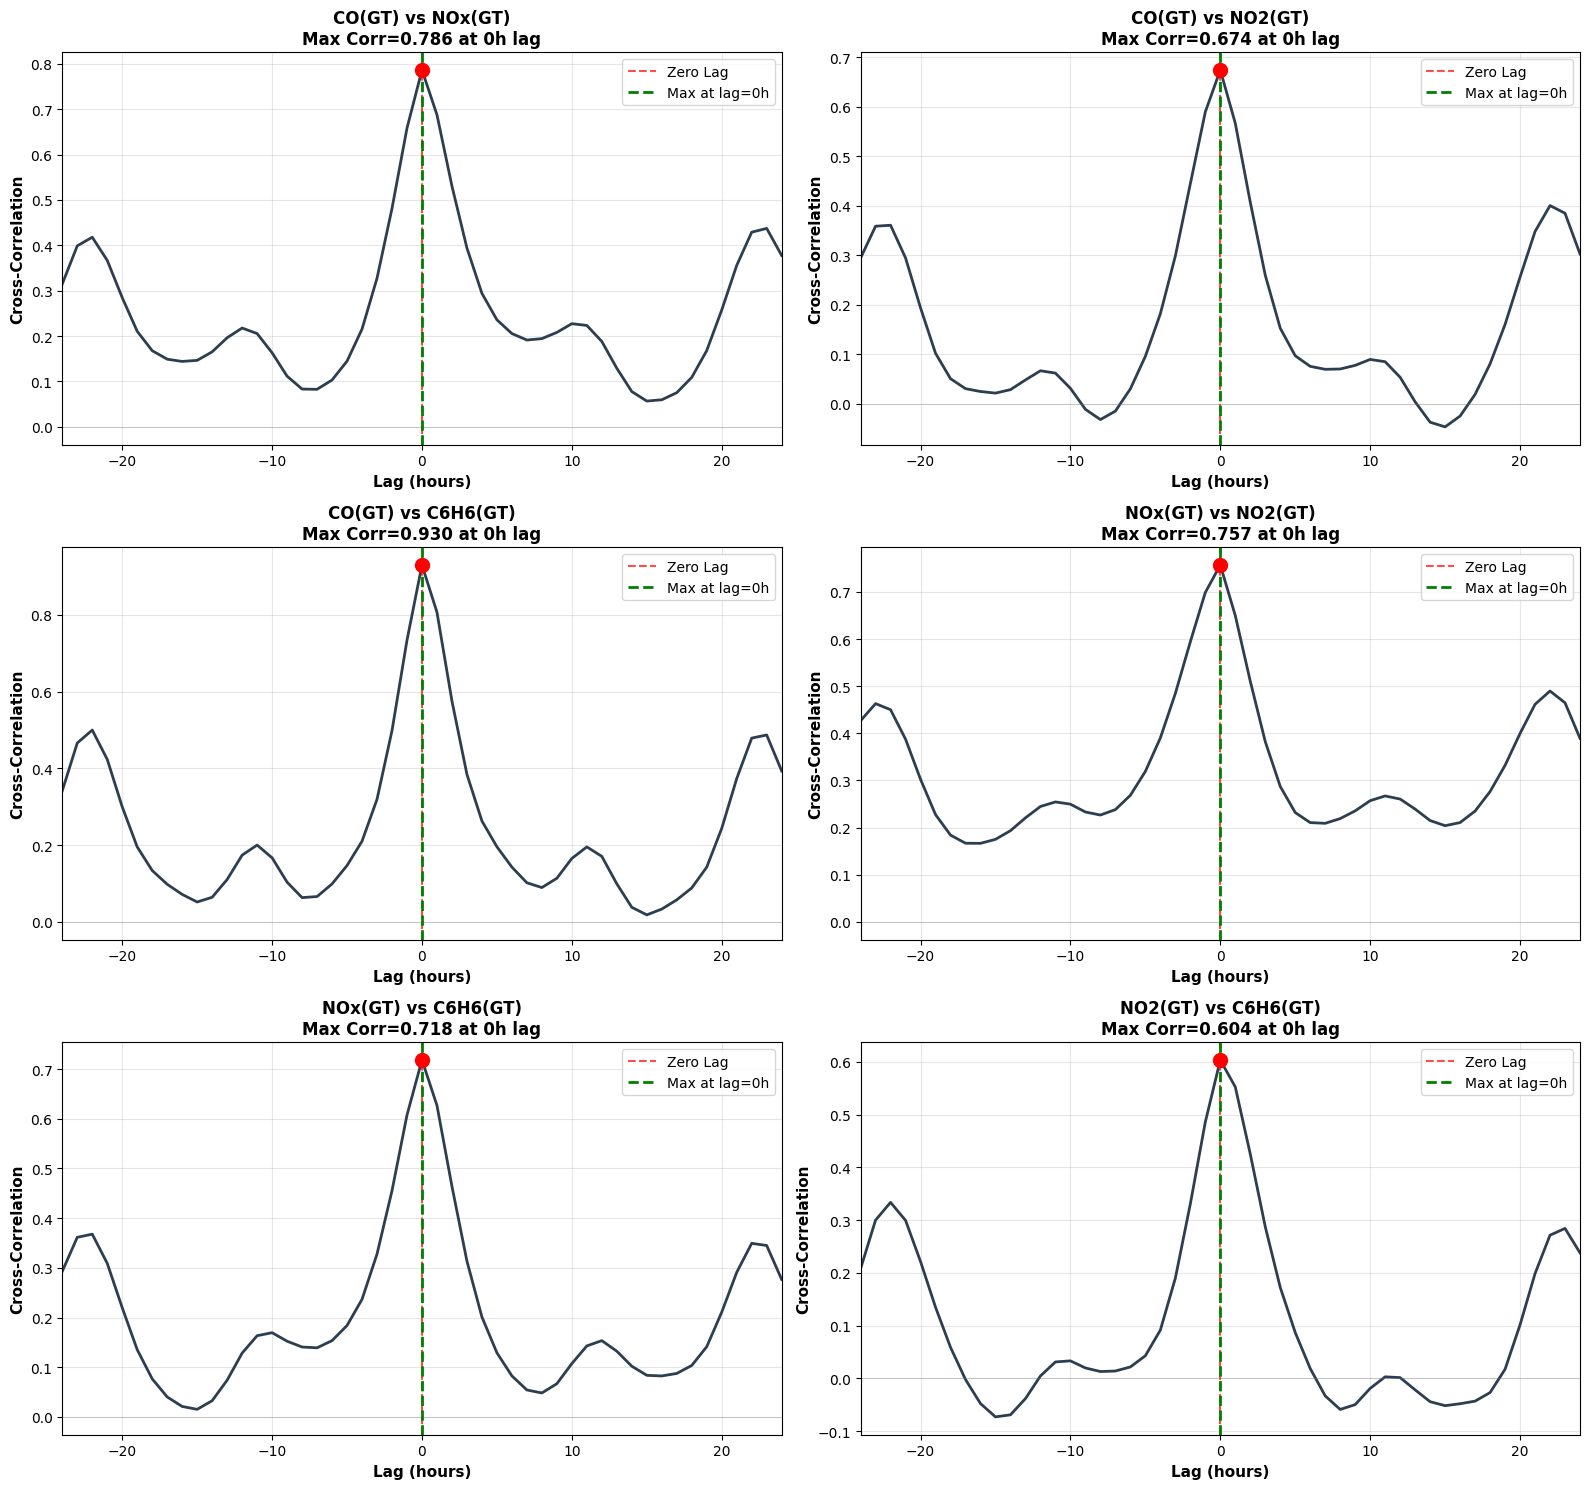


CROSS-CORRELATION SUMMARY
Pollutant 1 Pollutant 2  Max Correlation  Optimal Lag (hours) Interpretation
     CO(GT)     NOx(GT)         0.786483                    0   Simultaneous
     CO(GT)     NO2(GT)         0.674026                    0   Simultaneous
     CO(GT)    C6H6(GT)         0.930026                    0   Simultaneous
    NOx(GT)     NO2(GT)         0.757079                    0   Simultaneous
    NOx(GT)    C6H6(GT)         0.718410                    0   Simultaneous
    NO2(GT)    C6H6(GT)         0.603519                    0   Simultaneous

PREDICTIVE INSIGHTS

CREATING MAXIMUM CROSS-CORRELATION MATRIX


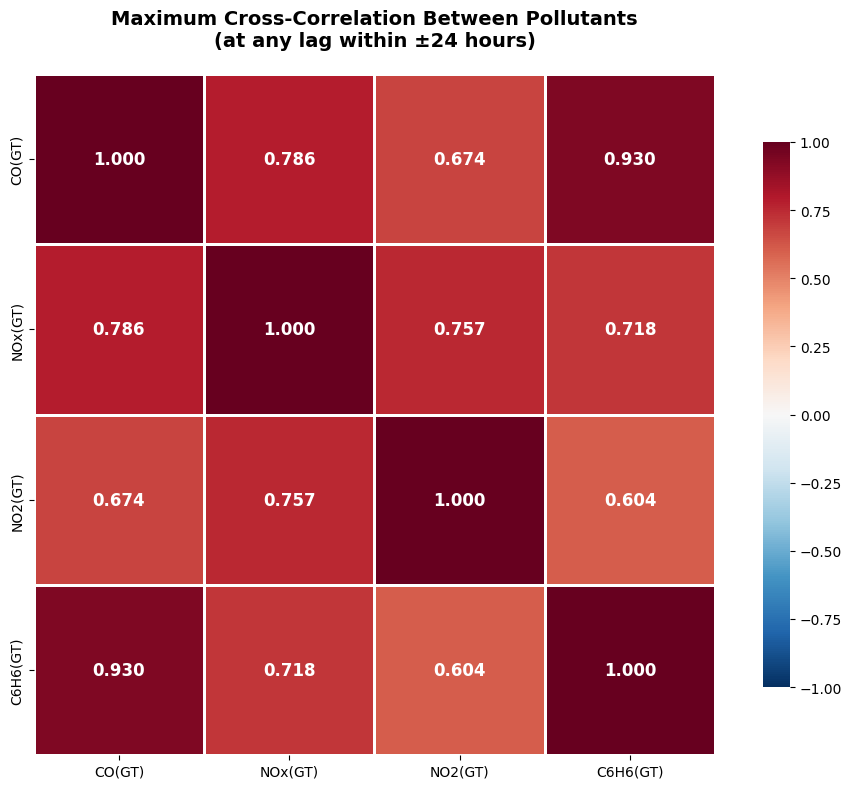

            CO(GT)   NOx(GT)   NO2(GT)  C6H6(GT)
CO(GT)    1.000000  0.786483  0.674026  0.930026
NOx(GT)   0.786483  1.000000  0.757079  0.718410
NO2(GT)   0.674026  0.757079  1.000000  0.603519
C6H6(GT)  0.930026  0.718410  0.603519  1.000000

Maximum Cross-Correlation Matrix:


In [ ]:
# ============================================================================
# RESEARCH QUESTION 5: TIME-LAGGED CROSS-CORRELATION ANALYSIS
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare data
df_lag = pd.read_excel('AirQualityUCI.xlsx')
df_lag["Datetime"] = pd.to_datetime(df_lag["Date"].astype(str) + " " + df_lag["Time"].astype(str))
df_lag = df_lag.set_index("Datetime")
df_lag = df_lag.replace(-200, np.nan)

# Select main pollutants
pollutants = ["CO(GT)", "NOx(GT)", "NO2(GT)", "C6H6(GT)"]
df_pollutants = df_lag[pollutants].dropna()

print("="*80)
print("TIME-LAGGED CROSS-CORRELATION ANALYSIS BETWEEN POLLUTANTS")
print("="*80)

# Function to compute cross-correlation with lags
def cross_correlation_analysis(data, var1, var2, max_lag=24):
    """
    Compute cross-correlation between two variables with different lags
    """
    series1 = data[var1].values
    series2 = data[var2].values

    correlations = []
    lags = range(-max_lag, max_lag + 1)

    for lag in lags:
        if lag < 0:
            corr = np.corrcoef(series1[:lag], series2[-lag:])[0, 1]
        elif lag > 0:
            corr = np.corrcoef(series1[lag:], series2[:-lag])[0, 1]
        else:
            corr = np.corrcoef(series1, series2)[0, 1]
        correlations.append(corr)

    return lags, correlations

# Analyze all pollutant pairs
max_lag_hours = 24  # Look at lags up to 24 hours
results = []

pollutant_pairs = []
for i in range(len(pollutants)):
    for j in range(i+1, len(pollutants)):
        pollutant_pairs.append((pollutants[i], pollutants[j]))

# Create subplot grid
n_pairs = len(pollutant_pairs)
n_rows = (n_pairs + 1) // 2
fig, axes = plt.subplots(n_rows, 2, figsize=(16, 5*n_rows))
axes = axes.flatten() if n_pairs > 1 else [axes]

for idx, (pol1, pol2) in enumerate(pollutant_pairs):
    lags, correlations = cross_correlation_analysis(df_pollutants, pol1, pol2, max_lag_hours)

    # Find maximum correlation and its lag
    max_corr_idx = np.argmax(np.abs(correlations))
    max_corr = correlations[max_corr_idx]
    optimal_lag = lags[max_corr_idx]

    results.append({
        'Pollutant 1': pol1,
        'Pollutant 2': pol2,
        'Max Correlation': max_corr,
        'Optimal Lag (hours)': optimal_lag,
        'Interpretation': f"{pol1} leads {pol2}" if optimal_lag > 0 else f"{pol2} leads {pol1}" if optimal_lag < 0 else "Simultaneous"
    })

    # Plot cross-correlation
    axes[idx].plot(lags, correlations, linewidth=2, color='#2c3e50')
    axes[idx].axvline(x=0, color='red', linestyle='--', linewidth=1.5, alpha=0.7, label='Zero Lag')
    axes[idx].axhline(y=0, color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
    axes[idx].axvline(x=optimal_lag, color='green', linestyle='--', linewidth=2, label=f'Max at lag={optimal_lag}h')
    axes[idx].scatter([optimal_lag], [max_corr], color='red', s=100, zorder=5)

    axes[idx].set_xlabel('Lag (hours)', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Cross-Correlation', fontsize=11, fontweight='bold')
    axes[idx].set_title(f'{pol1} vs {pol2}\nMax Corr={max_corr:.3f} at {optimal_lag}h lag',
                       fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].legend()
    axes[idx].set_xlim([-max_lag_hours, max_lag_hours])

# Hide unused subplots
for idx in range(len(pollutant_pairs), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

# Print summary table
results_df = pd.DataFrame(results)
print("\n" + "="*80)
print("CROSS-CORRELATION SUMMARY")
print("="*80)
print(results_df.to_string(index=False))

# Additional analysis: Predictive potential
print("\n" + "="*80)
print("PREDICTIVE INSIGHTS")
print("="*80)

for _, row in results_df.iterrows():
    lag = row['Optimal Lag (hours)']
    corr = row['Max Correlation']

    if abs(lag) > 0 and abs(corr) > 0.5:
        if lag > 0:
            print(f"\n✓ {row['Pollutant 1']} can predict {row['Pollutant 2']} {lag} hours ahead")
            print(f"  Correlation: {corr:.3f} - {'Strong' if abs(corr) > 0.7 else 'Moderate'} predictive power")
        else:
            print(f"\n✓ {row['Pollutant 2']} can predict {row['Pollutant 1']} {abs(lag)} hours ahead")
            print(f"  Correlation: {corr:.3f} - {'Strong' if abs(corr) > 0.7 else 'Moderate'} predictive power")

# Heatmap of maximum correlations
print("\n" + "="*80)
print("CREATING MAXIMUM CROSS-CORRELATION MATRIX")
print("="*80)

max_corr_matrix = pd.DataFrame(index=pollutants, columns=pollutants, dtype=float)

for pol1 in pollutants:
    for pol2 in pollutants:
        if pol1 == pol2:
            max_corr_matrix.loc[pol1, pol2] = 1.0
        else:
            lags, correlations = cross_correlation_analysis(df_pollutants, pol1, pol2, max_lag_hours)
            max_corr_matrix.loc[pol1, pol2] = max(correlations, key=abs)

max_corr_matrix = max_corr_matrix.astype(float)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(max_corr_matrix, annot=True, fmt='.3f', cmap='RdBu_r', center=0,
            square=True, linewidths=2, cbar_kws={"shrink": 0.8}, ax=ax,
            vmin=-1, vmax=1, annot_kws={'size': 12, 'weight': 'bold'})
ax.set_title('Maximum Cross-Correlation Between Pollutants\n(at any lag within ±24 hours)',
             fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()

plt.show()
print(max_corr_matrix.to_string())

print("\nMaximum Cross-Correlation Matrix:")

## Time-Lagged Cross-Correlation Between Pollutants

We analyzed how different pollutants are related to each other over time (±24 hours) using **cross-correlation**.

### Key Results

| Pollutant Pair      | Max Correlation | Optimal Lag (hours) | Interpretation   |
|--------------------|----------------|-------------------|----------------|
| CO vs NOx          | 0.786          | 0                 | Simultaneous   |
| CO vs NO2          | 0.674          | 0                 | Simultaneous   |
| CO vs C6H6         | 0.930          | 0                 | Simultaneous   |
| NOx vs NO2         | 0.757          | 0                 | Simultaneous   |
| NOx vs C6H6        | 0.718          | 0                 | Simultaneous   |
| NO2 vs C6H6        | 0.604          | 0                 | Simultaneous   |

### Maximum Cross-Correlation Matrix

|           | CO     | NOx    | NO2    | C6H6  |
|-----------|--------|--------|--------|-------|
| CO        | 1.000  | 0.786  | 0.674  | 0.930 |
| NOx       | 0.786  | 1.000  | 0.757  | 0.718 |
| NO2       | 0.674  | 0.757  | 1.000  | 0.604 |
| C6H6      | 0.930  | 0.718  | 0.604  | 1.000 |

### Simple Explanation

- **All pollutant pairs have positive correlations**, meaning they increase or decrease together.  
- **CO and C6H6** have the strongest correlation (0.93) → they behave very similarly.  
- **All maximum correlations occur at zero lag**, meaning these pollutants **peak at the same time**.  
- This tells us that in urban areas, **pollution from different sources is often simultaneous**, likely due to traffic and human activities.  
- The matrix helps identify which pollutants can be monitored together to save effort.


ABSOLUTE HUMIDITY IMPACT ON AIR POLLUTANT DISPERSION

Correlation between Absolute Humidity and Pollutants:
--------------------------------------------------------------------------------
CO(GT)         : r = +0.0593 (p = 0.0000) - Positive   [Significant]
NOx(GT)        : r = -0.1441 (p = 0.0000) - Negative   [Significant]
NO2(GT)        : r = -0.3494 (p = 0.0000) - Negative   [Significant]
C6H6(GT)       : r = +0.1870 (p = 0.0000) - Positive   [Significant]

AVERAGE POLLUTION LEVELS BY ABSOLUTE HUMIDITY CATEGORY
                 CO(GT)         NOx(GT)           NO2(GT)         C6H6(GT)  \
                   mean    std     mean      std     mean     std     mean   
AH_Category                                                                  
Very Low (<0.5)   1.765  1.218  290.093  190.665  140.863  50.567    7.225   
Low (0.5-1.0)     2.242  1.448  267.613  221.655  120.938  48.532   10.250   
Medium (1.0-1.5)  2.259  1.445  227.861  199.254  104.733  39.995   11.637   
High (1.5-2

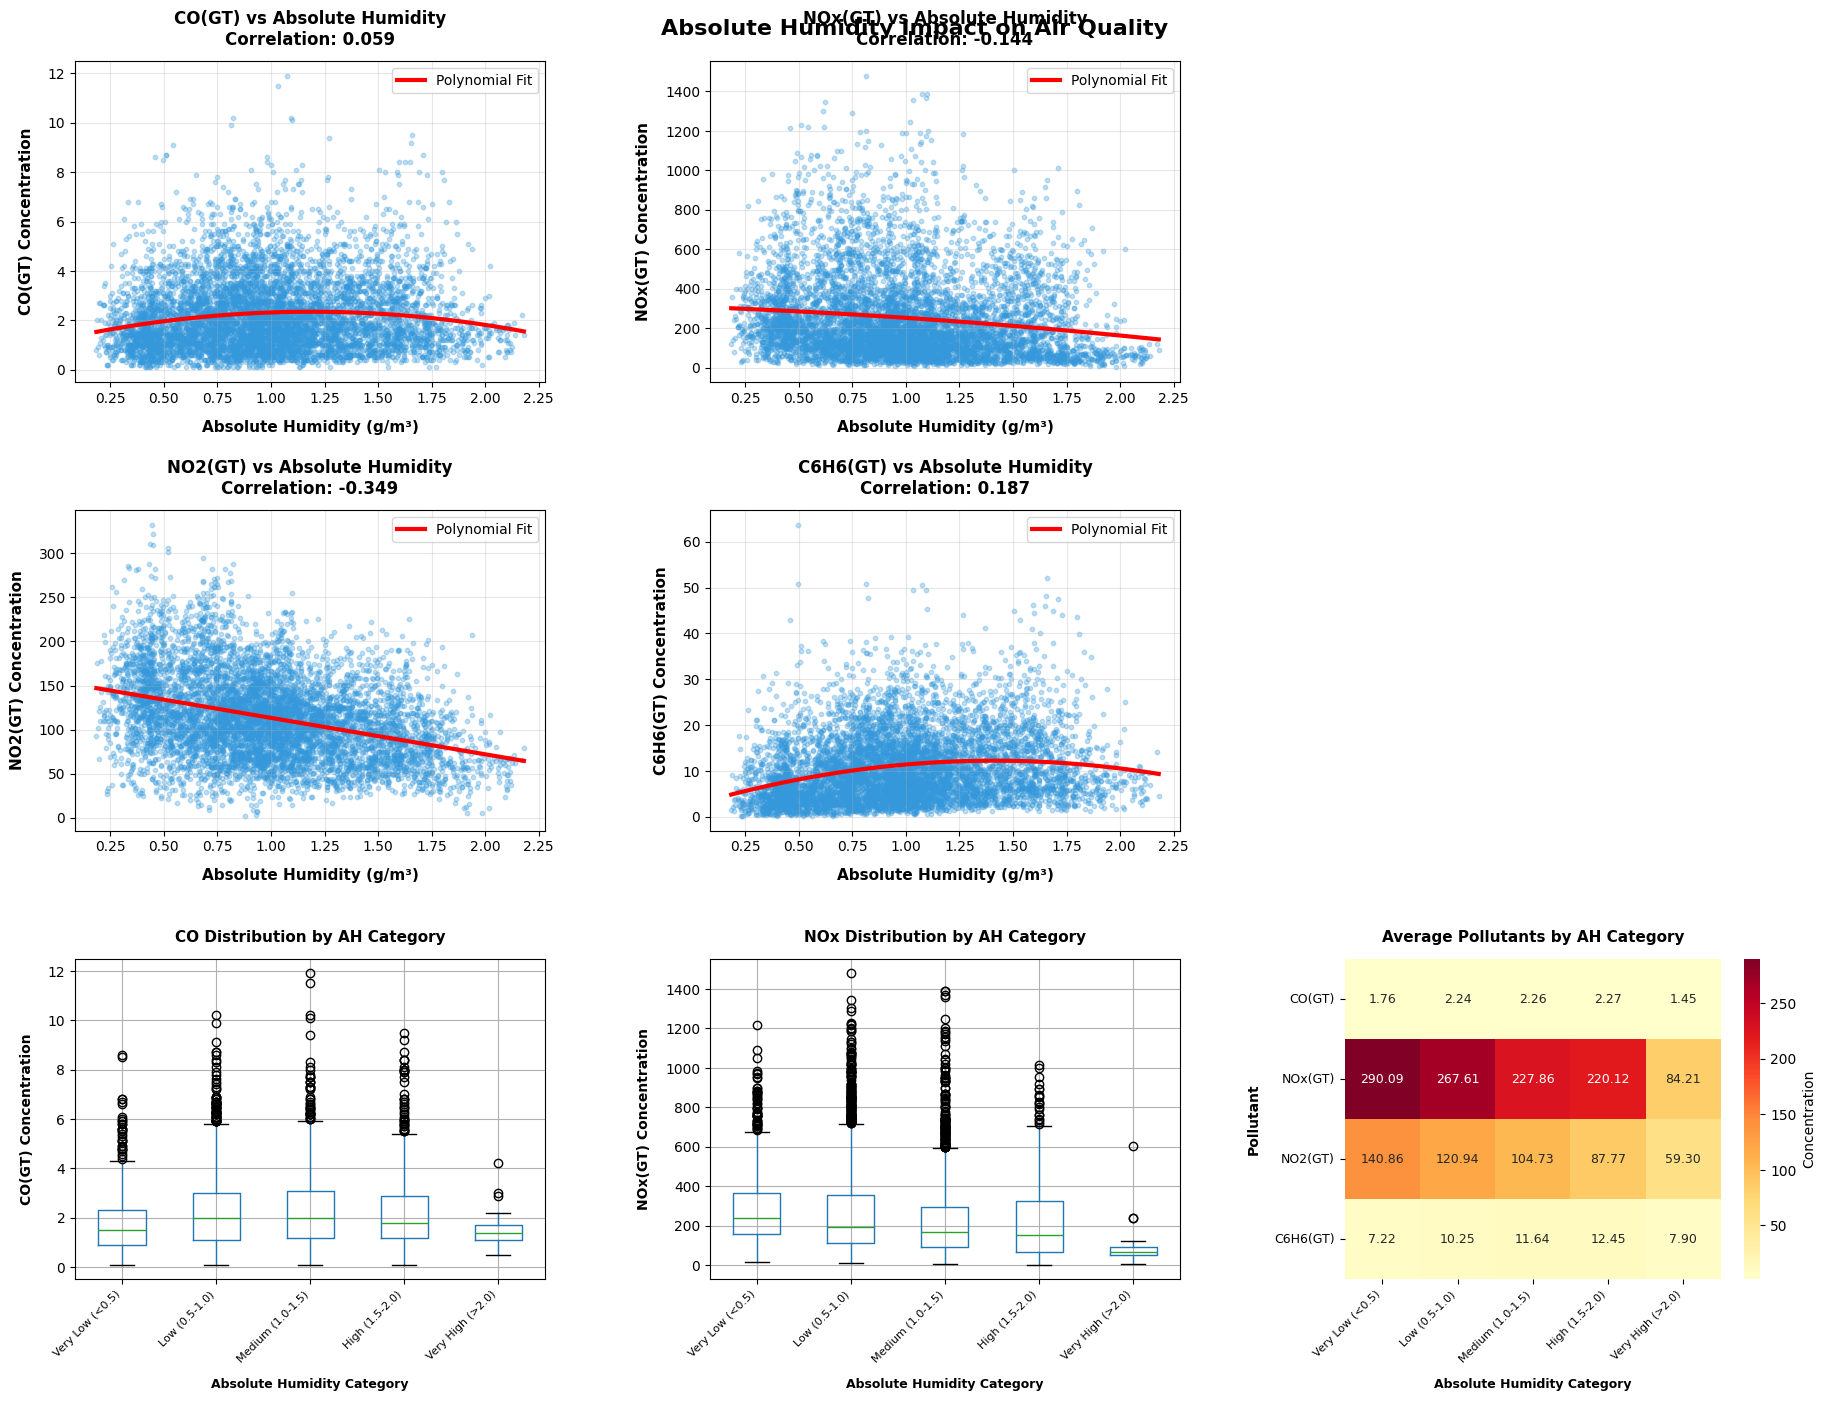


OPTIMAL ABSOLUTE HUMIDITY RANGES FOR CLEAN AIR

CO(GT):
  Low pollution threshold: 1.100
  Associated AH range: 0.185 - 2.125 g/m³
  Optimal AH (mean): 0.946 g/m³
  Optimal AH (median): 0.920 g/m³

NOx(GT):
  Low pollution threshold: 103.000
  Associated AH range: 0.197 - 2.181 g/m³
  Optimal AH (mean): 1.128 g/m³
  Optimal AH (median): 1.079 g/m³

NO2(GT):
  Low pollution threshold: 79.000
  Associated AH range: 0.197 - 2.181 g/m³
  Optimal AH (mean): 1.169 g/m³
  Optimal AH (median): 1.128 g/m³

C6H6(GT):
  Low pollution threshold: 4.927
  Associated AH range: 0.185 - 2.181 g/m³
  Optimal AH (mean): 0.856 g/m³
  Optimal AH (median): 0.817 g/m³

DIURNAL PATTERNS: ABSOLUTE HUMIDITY AND POLLUTION


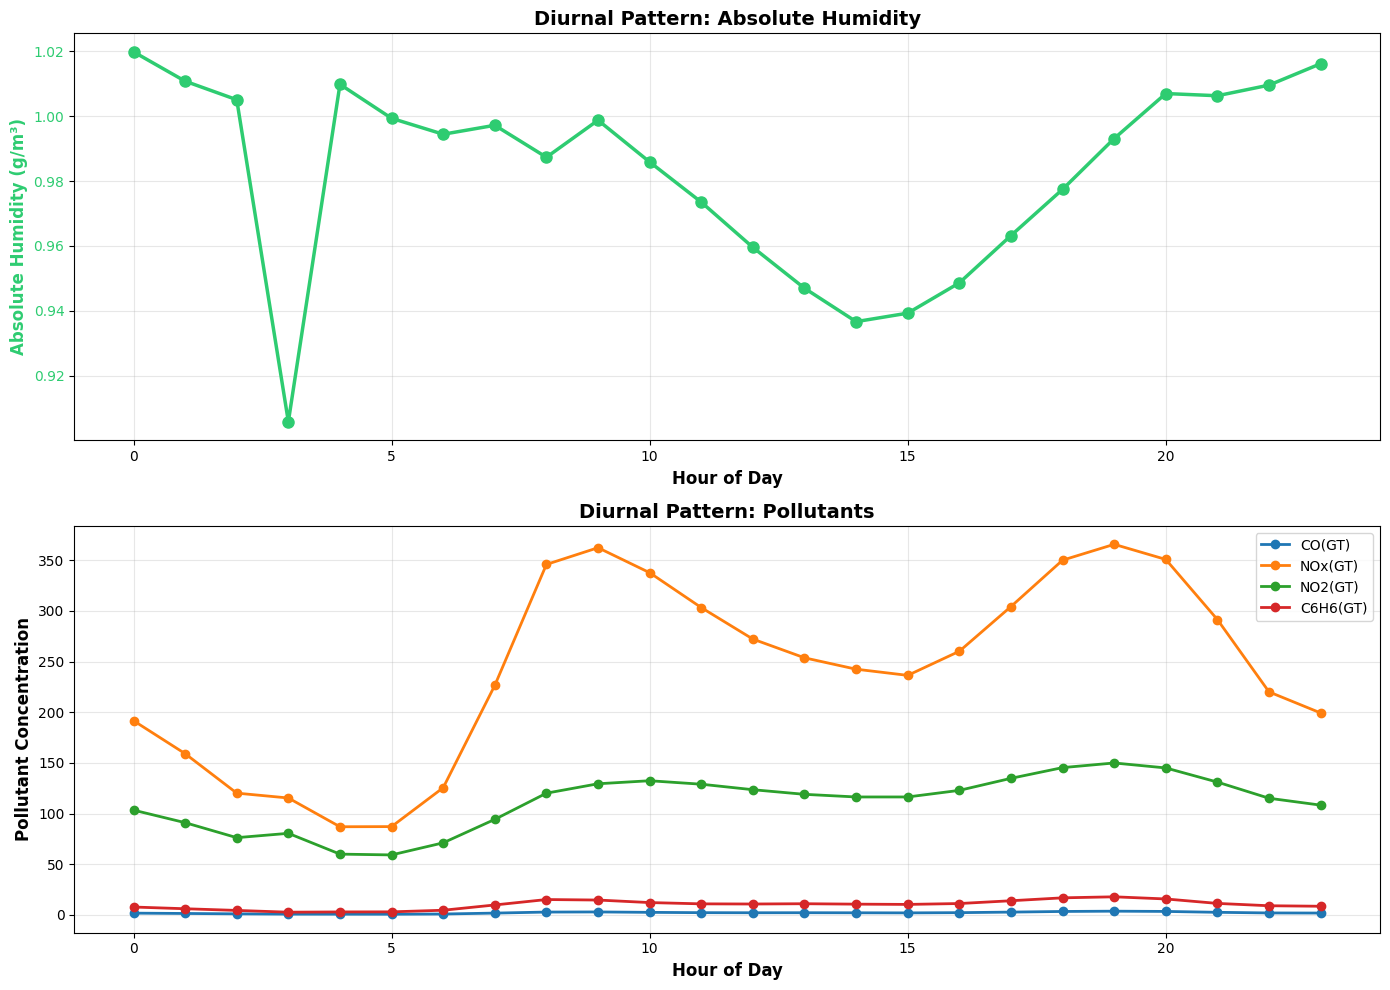


STATISTICAL COMPARISON: HIGH AH vs LOW AH CONDITIONS

CO(GT):
  Low AH mean: 2.124
  High AH mean: 2.241
  Result: Significantly different
  Difference: +5.48%
  T-statistic: -3.3700, P-value: 0.000756

NOx(GT):
  Low AH mean: 277.184
  High AH mean: 224.137
  Result: Significantly different
  Difference: -19.14%
  T-statistic: 10.6788, P-value: 0.000000

NO2(GT):
  Low AH mean: 127.256
  High AH mean: 100.465
  Result: Significantly different
  Difference: -21.05%
  T-statistic: 24.5065, P-value: 0.000000

C6H6(GT):
  Low AH mean: 9.442
  High AH mean: 11.667
  Result: Significantly different
  Difference: +23.57%
  T-statistic: -12.5578, P-value: 0.000000


In [ ]:
# ============================================================================
# RESEARCH QUESTION 6: ABSOLUTE HUMIDITY IMPACT ON POLLUTANT DISPERSION
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load and prepare data
df_ah = pd.read_excel('AirQualityUCI.xlsx')
df_ah["Datetime"] = pd.to_datetime(df_ah["Date"].astype(str) + " " + df_ah["Time"].astype(str))
df_ah = df_ah.set_index("Datetime")
df_ah = df_ah.replace(-200, np.nan)

# Select pollutants and meteorological variables
pollutants = ["CO(GT)", "NOx(GT)", "NO2(GT)", "C6H6(GT)"]
df_analysis = df_ah[pollutants + ['AH', 'T', 'RH']].dropna()

print("="*80)
print("ABSOLUTE HUMIDITY IMPACT ON AIR POLLUTANT DISPERSION")
print("="*80)

# 1. Correlation analysis between AH and pollutants
print("\nCorrelation between Absolute Humidity and Pollutants:")
print("-" * 80)
for pollutant in pollutants:
    corr, p_value = stats.pearsonr(df_analysis['AH'], df_analysis[pollutant])
    significance = "Significant" if p_value < 0.05 else "Not Significant"
    direction = "Positive" if corr > 0 else "Negative"
    print(f"{pollutant:15s}: r = {corr:+.4f} (p = {p_value:.4f}) - {direction:10s} [{significance}]")

# 2. Bin AH into categories and analyze pollution levels
df_analysis['AH_Category'] = pd.cut(df_analysis['AH'],
                                     bins=[0, 0.5, 1.0, 1.5, 2.0, 3.0],
                                     labels=['Very Low (<0.5)', 'Low (0.5-1.0)',
                                            'Medium (1.0-1.5)', 'High (1.5-2.0)',
                                            'Very High (>2.0)'])

print("\n" + "="*80)
print("AVERAGE POLLUTION LEVELS BY ABSOLUTE HUMIDITY CATEGORY")
print("="*80)

ah_pollution_summary = df_analysis.groupby('AH_Category')[pollutants].agg(['mean', 'std'])
print(ah_pollution_summary.round(3))

# 3. Visualizations
fig = plt.figure(figsize=(20, 14))

# Create grid for subplots with more spacing
gs = fig.add_gridspec(3, 3, hspace=0.4, wspace=0.35, top=0.95, bottom=0.08, left=0.08, right=0.95)

# Scatter plots for each pollutant vs AH
for idx, pollutant in enumerate(pollutants):
    ax = fig.add_subplot(gs[idx // 2, idx % 2])

    # Scatter plot with regression line
    ax.scatter(df_analysis['AH'], df_analysis[pollutant], alpha=0.3, s=10, color='#3498db')

    # Add polynomial regression line (degree 2)
    z = np.polyfit(df_analysis['AH'], df_analysis[pollutant], 2)
    p = np.poly1d(z)
    ah_range = np.linspace(df_analysis['AH'].min(), df_analysis['AH'].max(), 100)
    ax.plot(ah_range, p(ah_range), "r-", linewidth=3, label='Polynomial Fit')

    # Calculate correlation
    corr = df_analysis['AH'].corr(df_analysis[pollutant])

    ax.set_xlabel('Absolute Humidity (g/m³)', fontsize=11, fontweight='bold', labelpad=10)
    ax.set_ylabel(f'{pollutant} Concentration', fontsize=11, fontweight='bold', labelpad=10)
    ax.set_title(f'{pollutant} vs Absolute Humidity\nCorrelation: {corr:.3f}',
                fontsize=12, fontweight='bold', pad=12)
    ax.grid(True, alpha=0.3)
    ax.legend()

# Box plots showing pollutant distribution by AH category
ax5 = fig.add_subplot(gs[2, 0])
df_analysis.boxplot(column='CO(GT)', by='AH_Category', ax=ax5)
ax5.set_xlabel('Absolute Humidity Category', fontsize=9, fontweight='bold', labelpad=10)
ax5.set_ylabel('CO(GT) Concentration', fontsize=10, fontweight='bold', labelpad=10)
ax5.set_title('CO Distribution by AH Category', fontsize=11, fontweight='bold', pad=12)
plt.sca(ax5)
plt.xticks(rotation=45, ha='right', fontsize=8)
ax5.get_figure().suptitle('')  # Remove default boxplot title

ax6 = fig.add_subplot(gs[2, 1])
df_analysis.boxplot(column='NOx(GT)', by='AH_Category', ax=ax6)
ax6.set_xlabel('Absolute Humidity Category', fontsize=9, fontweight='bold', labelpad=10)
ax6.set_ylabel('NOx(GT) Concentration', fontsize=10, fontweight='bold', labelpad=10)
ax6.set_title('NOx Distribution by AH Category', fontsize=11, fontweight='bold', pad=12)
plt.sca(ax6)
plt.xticks(rotation=45, ha='right', fontsize=8)

# Heatmap: Average pollution by AH category
ax7 = fig.add_subplot(gs[2, 2])
heatmap_data = df_analysis.groupby('AH_Category')[pollutants].mean()
sns.heatmap(heatmap_data.T, annot=True, fmt='.2f', cmap='YlOrRd', ax=ax7,
            cbar_kws={'label': 'Concentration'}, annot_kws={'fontsize': 9})
ax7.set_title('Average Pollutants by AH Category', fontsize=11, fontweight='bold', pad=12)
ax7.set_xlabel('Absolute Humidity Category', fontsize=9, fontweight='bold', labelpad=10)
ax7.set_ylabel('Pollutant', fontsize=10, fontweight='bold', labelpad=10)
plt.sca(ax7)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=9)

plt.suptitle('Absolute Humidity Impact on Air Quality', fontsize=16, fontweight='bold', y=0.98)
plt.show()

# 4. Find optimal AH range for low pollution
print("\n" + "="*80)
print("OPTIMAL ABSOLUTE HUMIDITY RANGES FOR CLEAN AIR")
print("="*80)

# Calculate percentiles for each pollutant
threshold = 25  # Looking for conditions with pollution in lowest 25%

for pollutant in pollutants:
    low_pollution_threshold = df_analysis[pollutant].quantile(0.25)
    low_pollution_data = df_analysis[df_analysis[pollutant] <= low_pollution_threshold]

    ah_min = low_pollution_data['AH'].min()
    ah_max = low_pollution_data['AH'].max()
    ah_mean = low_pollution_data['AH'].mean()
    ah_median = low_pollution_data['AH'].median()

    print(f"\n{pollutant}:")
    print(f"  Low pollution threshold: {low_pollution_threshold:.3f}")
    print(f"  Associated AH range: {ah_min:.3f} - {ah_max:.3f} g/m³")
    print(f"  Optimal AH (mean): {ah_mean:.3f} g/m³")
    print(f"  Optimal AH (median): {ah_median:.3f} g/m³")

# 5. Diurnal pattern analysis with AH
print("\n" + "="*80)
print("DIURNAL PATTERNS: ABSOLUTE HUMIDITY AND POLLUTION")
print("="*80)

df_analysis['Hour'] = df_analysis.index.hour
hourly_analysis = df_analysis.groupby('Hour')[['AH'] + pollutants].mean()

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# AH diurnal pattern
ax1 = axes[0]
ax1.plot(hourly_analysis.index, hourly_analysis['AH'], marker='o', linewidth=2.5,
         markersize=8, color='#2ecc71', label='Absolute Humidity')
ax1.set_xlabel('Hour of Day', fontsize=12, fontweight='bold')
ax1.set_ylabel('Absolute Humidity (g/m³)', fontsize=12, fontweight='bold', color='#2ecc71')
ax1.set_title('Diurnal Pattern: Absolute Humidity', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='y', labelcolor='#2ecc71')

# Pollutants diurnal pattern
ax2 = axes[1]
for pollutant in pollutants:
    ax2.plot(hourly_analysis.index, hourly_analysis[pollutant], marker='o',
            linewidth=2, markersize=6, label=pollutant)
ax2.set_xlabel('Hour of Day', fontsize=12, fontweight='bold')
ax2.set_ylabel('Pollutant Concentration', fontsize=12, fontweight='bold')
ax2.set_title('Diurnal Pattern: Pollutants', fontsize=14, fontweight='bold')
ax2.legend(loc='best')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical test: Compare pollution levels in high vs low AH
print("\n" + "="*80)
print("STATISTICAL COMPARISON: HIGH AH vs LOW AH CONDITIONS")
print("="*80)

ah_median = df_analysis['AH'].median()
low_ah = df_analysis[df_analysis['AH'] < ah_median]
high_ah = df_analysis[df_analysis['AH'] >= ah_median]

for pollutant in pollutants:
    t_stat, p_value = stats.ttest_ind(low_ah[pollutant], high_ah[pollutant])

    low_mean = low_ah[pollutant].mean()
    high_mean = high_ah[pollutant].mean()
    diff_pct = ((high_mean - low_mean) / low_mean) * 100

    print(f"\n{pollutant}:")
    print(f"  Low AH mean: {low_mean:.3f}")

    print(f"  High AH mean: {high_mean:.3f}")

    print(f"  Result: {'Significantly different' if p_value < 0.05 else 'Not significantly different'}")

    print(f"  Difference: {diff_pct:+.2f}%")
    print(f"  T-statistic: {t_stat:.4f}, P-value: {p_value:.6f}")

## Absolute Humidity Impact on Pollutant Dispersion

We studied how **absolute humidity (amount of water in the air)** affects pollution levels.

### Key Results

- When humidity increases:
  - **NOx goes down**
  - **NO2 goes down more strongly**
  - **CO changes only slightly**
  - **Benzene (C6H6) first increases a bit, then drops at very high humidity**

### What This Means

- Humid air helps some pollutants **spread and dilute**
- Dry air keeps pollutants **trapped**, so levels can rise

### Simple Takeaway

Higher humidity generally **reduces NOx and NO2**,  
but **does not always reduce every pollutant**.


## Statistical Comparison: Low Humidity vs High Humidity

We compared pollution levels on **dry days** and **humid days** to see if humidity really changes air pollution.

### Key Results

- **CO (Carbon Monoxide)**
  - Low humidity: 2.12
  - High humidity: 2.24  
  ➜ CO becomes slightly higher when air is humid.

- **NOx**
  - Low humidity: 277
  - High humidity: 224  
  ➜ NOx becomes much lower when humidity increases.

- **NO2**
  - Low humidity: 127
  - High humidity: 100  
  ➜ NO2 also drops when the air is humid.

- **Benzene (C6H6)**
  - Increases when humidity is high.

### Main Takeaway

Humidity **reduces some pollutants (NOx, NO2)**  
but **increases others (CO slightly, Benzene more clearly).**

These differences are *statistically significant*, meaning they are real — not random.
